In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
import yfinance as yf


pd.options.display.float_format = '{:.4%}'.format

In [79]:
# Date range
start = '2015-01-01'
end = '2019-12-30'

# Tickers of assets
# assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
#           'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
#           'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

assets = ['JCI','TGT', 'CMCSA', 'CPB', 'MO', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
prices = yf.download(assets, start = start, end = end)['Adj Close']
prices.columns = assets

[*********************100%%**********************]  23 of 23 completed


In [80]:
returns = np.log(prices / prices.shift(1)).dropna()
returns

,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,JPM,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.6950%,-2.5140%,-1.5751%,-2.0604%,-3.2254%,-1.5344%,-2.1627%,-1.6790%,-1.5250%,-3.1537%,...,-1.1848%,-3.4180%,0.4689%,-1.4389%,-0.9493%,-1.8083%,-1.3832%,-1.9395%,-0.8340%,-3.8189%
2015-01-06,-1.1848%,-0.5329%,-0.1709%,-1.3131%,-2.2542%,-0.6715%,-0.8363%,-0.7610%,-1.1003%,-2.6271%,...,-1.1750%,0.1366%,1.6921%,0.5214%,0.1489%,-0.0135%,-0.9382%,-0.4361%,1.0042%,-3.8941%
2015-01-07,1.5406%,0.4770%,1.2913%,-0.0906%,1.2880%,4.3198%,-0.4326%,1.1645%,1.5881%,0.1525%,...,1.6743%,1.3255%,2.0282%,0.1417%,0.5813%,3.7154%,2.9517%,0.6535%,-0.6474%,0.9500%
2015-01-08,1.7528%,2.5563%,2.4676%,2.1514%,2.3551%,2.0010%,1.3151%,2.3630%,1.9048%,2.2101%,...,1.8099%,1.3082%,1.3532%,1.8242%,0.9900%,0.4678%,1.0340%,4.4127%,2.1207%,1.3897%
2015-01-09,-0.1975%,-1.2631%,-0.6609%,-0.1598%,-2.1347%,-0.2859%,-0.9759%,-0.0246%,-0.6156%,-1.7540%,...,-0.9831%,-3.7314%,0.3027%,-1.5884%,-0.2989%,-0.9117%,-0.4000%,-1.7230%,-0.8942%,-2.8373%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-1.6629%,0.3279%,1.0446%,1.0259%,-0.1869%,1.9510%,1.0881%,1.2727%,1.1222%,-0.0802%,...,0.5418%,0.6005%,0.6546%,1.9384%,0.5635%,0.3490%,1.0677%,1.1795%,2.0673%,0.2715%
2019-12-23,2.8700%,2.4311%,-0.4735%,0.0227%,0.0000%,-0.1221%,0.2288%,0.0000%,-0.0243%,-0.0291%,...,-1.1230%,-0.7763%,-0.6023%,-0.4687%,-0.2045%,-0.6291%,0.4032%,0.8153%,-1.0853%,-0.5633%
2019-12-24,-1.3571%,0.2009%,-0.0791%,0.9703%,0.1122%,0.2440%,-0.3147%,0.1458%,-0.2186%,0.2766%,...,-0.0729%,-0.0755%,-0.1762%,-0.3964%,-0.2820%,0.1635%,-0.4675%,-1.1699%,-0.1956%,0.3694%


In [84]:
matriz_cov = returns.cov().to_numpy() # Covariance matrix
# mu = returns.mean().to_numpy().reshape(-1,1) # Inicialmente estaba así
retornos_esperados = returns.mean().to_numpy() # Column vector expected return

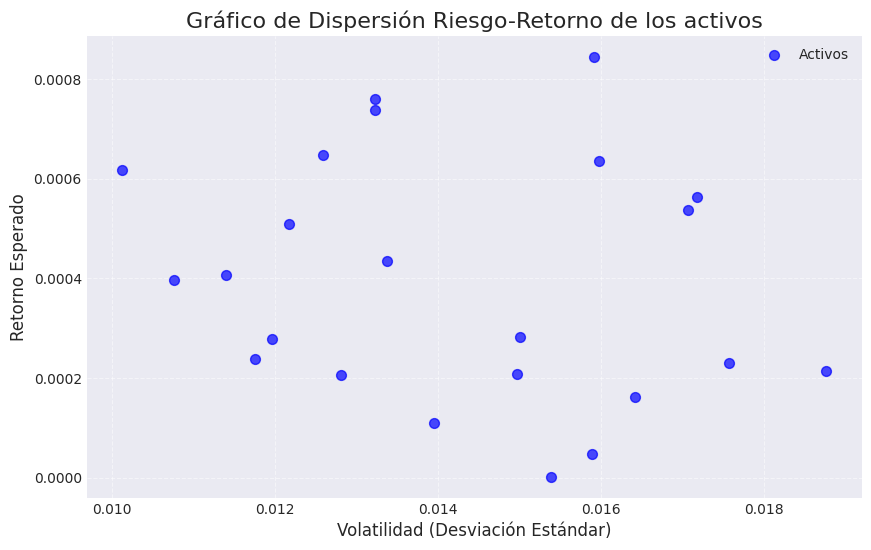

In [129]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)


# Añadiendo títulos y etiquetas
plt.title('Gráfico de Dispersión Riesgo-Retorno de los activos', fontsize=16)
plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)

# Añadiendo leyenda con mejor posición
plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()


In [90]:
n = retornos_esperados.shape[0]

In [91]:
pesos = cp.Variable(n)

In [92]:
# Función objetivo
riesgo = cp.quad_form(pesos, matriz_cov)

In [93]:
#cálculo de la cartera de mínima varianza
pesos = cp.Variable((n,1))

riesgo = cp.quad_form(pesos, matriz_cov) # quadratic form
ret = retornos_esperados.T @ pesos

constraints = [pesos >= 0,
               cp.sum(pesos) == 1,
               ]

objective = cp.Minimize(riesgo)

prob = cp.Problem(objective, constraints)
prob.solve()

min_riesgo = np.array([riesgo.value[0][0], ret.value[0]])


In [94]:
# Cálculo de la cartera de máxima rentabilidad

pesos = cp.Variable((n,1))

riesgo = cp.quad_form(pesos, matriz_cov) # quadratic form
ret = retornos_esperados.T @ pesos

constraints = [pesos >= 0,
                cp.sum(pesos) == 1,
                ]

objective = cp.Maximize(ret)

prob = cp.Problem(objective, constraints)
prob.solve()

max_ret = np.array([riesgo.value[0][0], ret.value[0]])

/usr/local/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [95]:
np.array([riesgo.value[0][0], ret.value[0]])

array([0.00025349, 0.00084494])

In [96]:
ret.value[0]

0.0008449383229103574

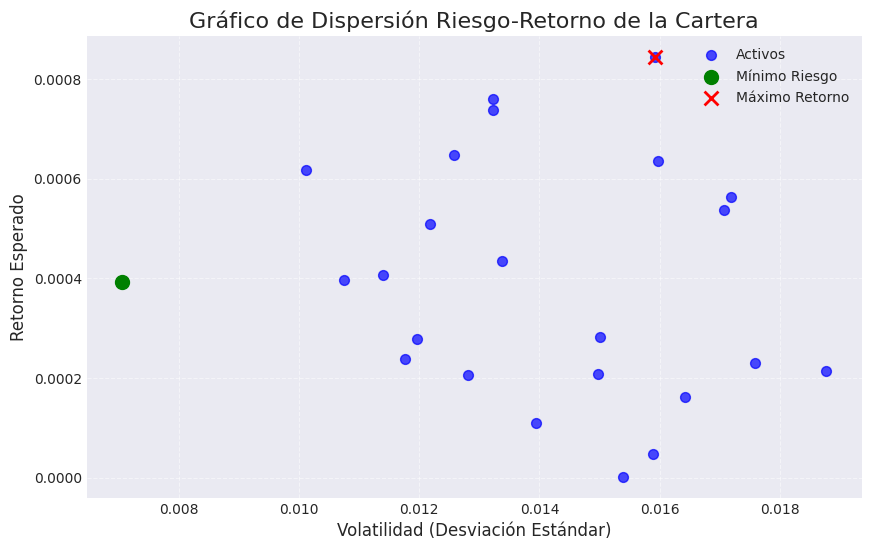

In [126]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)

# Punto de mínimo riesgo
plt.scatter(np.sqrt(min_riesgo[0]), min_riesgo[1], color='green', s=100, marker='o', label='Mínimo Riesgo')

# Punto de máximo retorno
plt.scatter(np.sqrt(max_ret[0]), max_ret[1], color='red', s=100, marker='x', linewidths=2, label='Máximo Retorno')

# Añadiendo títulos y etiquetas
plt.title('Gráfico de Dispersión Riesgo-Retorno de la Cartera', fontsize=16)
plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)

# Añadiendo leyenda con mejor posición
plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()


In [113]:
risks = np.linspace(min_riesgo[0], 0.00025, 50)

pesos = cp.Variable((n,1))

riesgo = cp.quad_form(pesos, matriz_cov) # quadratic form
ret = retornos_esperados.T @ pesos

constraints = [pesos >= 0,
                cp.sum(pesos) == 1,
                ]

objective = cp.Maximize(ret)

frontier = pd.DataFrame([], index=assets)
var_lst = []
ret_lst = []
for variance in risks:
    constraints.append(riesgo <= variance)
    prob = cp.Problem(objective, constraints)
    prob.solve()
    weights = pd.DataFrame(pesos.value, index=assets)
    frontier = pd.concat([frontier, weights], axis=1)
    var_lst.append(variance)
    ret_lst.append(ret.value[0])
    constraints.pop()


/usr/local/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


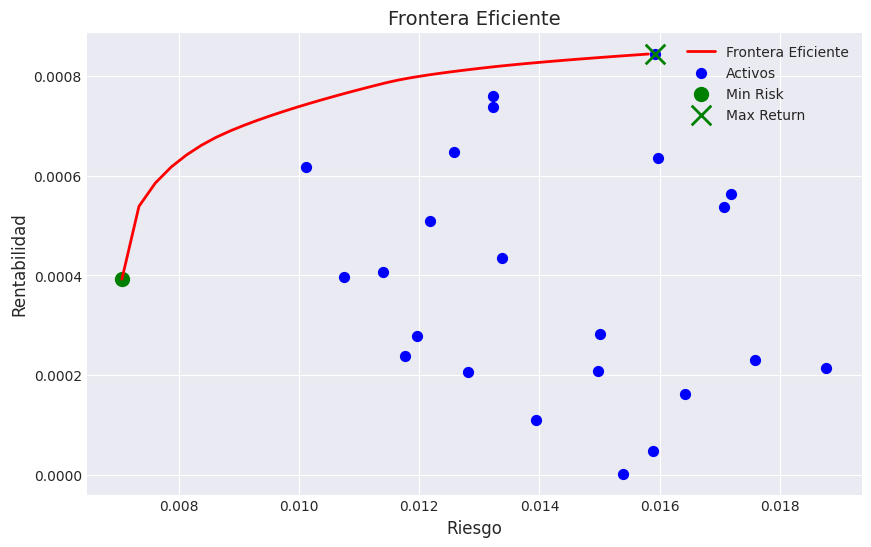

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Creando el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo del gráfico

# Frontera eficiente
plt.plot(np.sqrt(var_lst), ret_lst, color='red', label='Frontera Eficiente', linewidth=2)

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos')

# Punto de mínimo riesgo
plt.scatter(np.sqrt(min_riesgo[0]), min_riesgo[1], color='green', s=100, marker='o', label='Min Risk')

# Punto de máximo retorno
plt.scatter(np.sqrt(max_ret[0]), max_ret[1], color='green', s=200, marker='x', linewidths=2, label='Max Return')

# Añadiendo títulos y etiquetas
plt.title('Frontera Eficiente', fontsize=14)
plt.xlabel('Riesgo', fontsize=12)
plt.ylabel('Rentabilidad', fontsize=12)

# Añadiendo leyenda
plt.legend()

# Mostrando la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()
